# 회귀 모형 예제
- boruta shap 
- RF/ lightGBM/ xgboost/ catboost/ extra tree 적용
- 미지원 목록 ngboost/ Stacking/ Voting/ AdaBoost/ GradientBoost/ HistGradientBoost

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from BorutaShap import BorutaShap, load_data
"""
model=RandomForest
importance_measure= Shap or Gini/Gain
classification=True/False
percentile= Integer
p_value= float
"""
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)
X, y = load_data(data_type='regression')
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


In [2]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
193,0.02187,60.0,2.93,0.0,0.401,6.800,9.9,6.2196,1.0,265.0,15.6,393.37,5.03
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24.0,666.0,20.2,43.06,23.98
33,1.15172,0.0,8.14,0.0,0.538,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35
248,0.16439,22.0,5.86,0.0,0.431,6.433,49.1,7.8265,7.0,330.0,19.1,374.71,9.52
399,9.91655,0.0,18.10,0.0,0.693,5.852,77.8,1.5004,24.0,666.0,20.2,338.16,29.97


100%|██████████| 100/100 [01:46<00:00,  1.06s/it]


10 attributes confirmed important: ['PTRATIO', 'B', 'TAX', 'NOX', 'LSTAT', 'CRIM', 'INDUS', 'AGE', 'DIS', 'RM']
3 attributes confirmed unimportant: ['ZN', 'RAD', 'CHAS']
0 tentative attributes remains: []


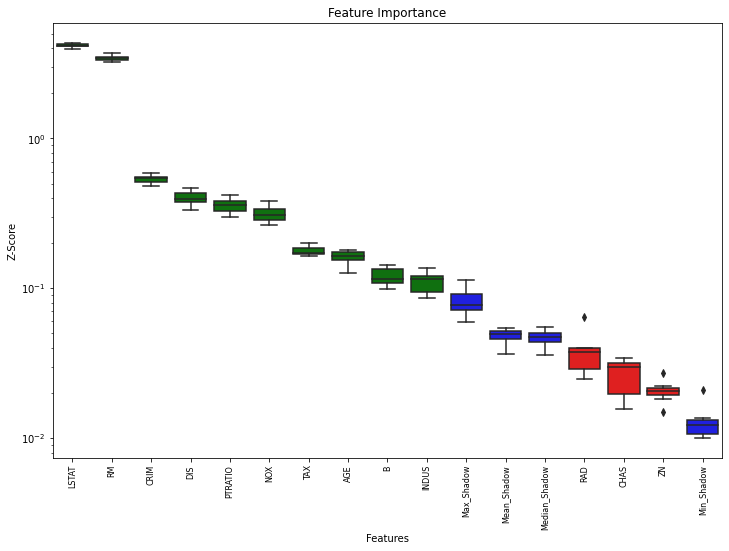

In [3]:
"""
 X: Dataframe
 y: Series/ndarray
 random_state: int #seed
 Sample: Boolean
 sample_fraction: float
 train_or_test: string 
 n_trials = Int #시행횟수
"""
Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(which_features='all')

100%|██████████| 10/10 [00:04<00:00,  2.42it/s]


8 attributes confirmed important: ['PTRATIO', 'TAX', 'NOX', 'LSTAT', 'CRIM', 'AGE', 'DIS', 'RM']
3 attributes confirmed unimportant: ['ZN', 'RAD', 'CHAS']
2 tentative attributes remains: ['B', 'INDUS']


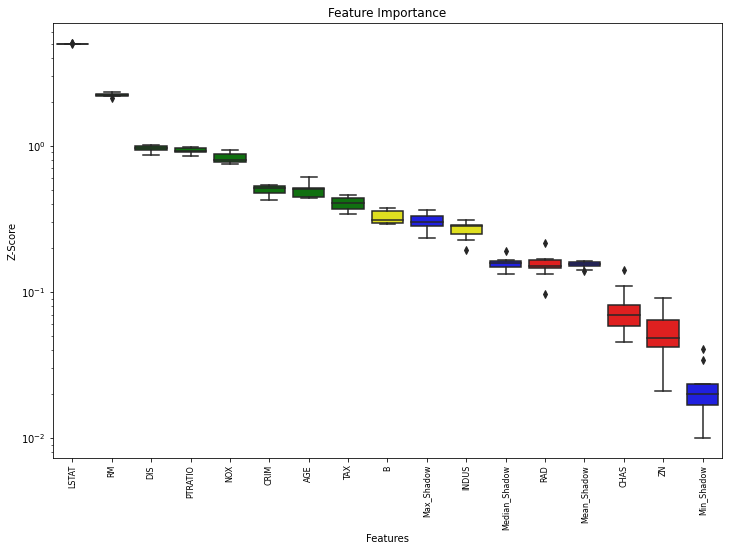

In [4]:
from lightgbm import LGBMRegressor
import lightgbm as lgb
lgb_train=lgb.Dataset(X_train,Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

model=LGBMRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

 20%|██        | 2/10 [00:00<00:00, 11.90it/s]

[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 40%|████      | 4/10 [00:00<00:00, 11.78it/s]

[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


 80%|████████  | 8/10 [00:00<00:00, 11.82it/s]

[23:04:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:04:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 10/10 [00:00<00:00, 11.87it/s]


[23:04:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
8 attributes confirmed important: ['PTRATIO', 'B', 'NOX', 'LSTAT', 'CRIM', 'AGE', 'DIS', 'RM']
4 attributes confirmed unimportant: ['ZN', 'RAD', 'CHAS', 'INDUS']
1 tentative attributes remains: ['TAX']


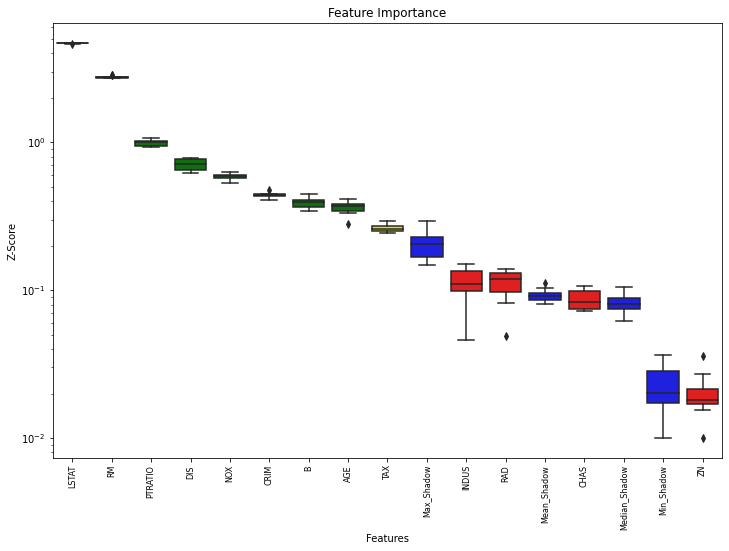

In [5]:
from xgboost import XGBRegressor
model=XGBRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

100%|██████████| 10/10 [00:00<00:00, 12.66it/s]


3 attributes confirmed important: ['LSTAT', 'TAX', 'RM']
10 attributes confirmed unimportant: ['PTRATIO', 'B', 'CHAS', 'NOX', 'CRIM', 'RAD', 'INDUS', 'ZN', 'AGE', 'DIS']
0 tentative attributes remains: []


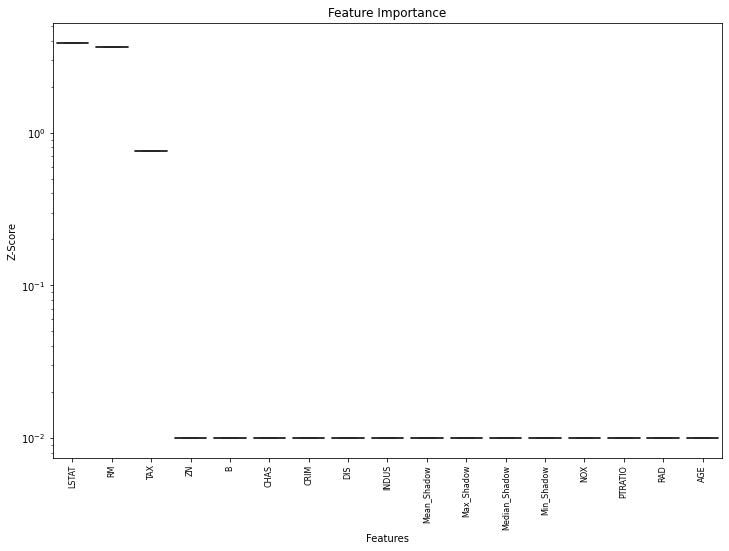

In [6]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(iterations=2,learning_rate=1,depth=2)
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

100%|██████████| 10/10 [00:10<00:00,  1.10s/it]


6 attributes confirmed important: ['PTRATIO', 'NOX', 'LSTAT', 'CRIM', 'DIS', 'RM']
3 attributes confirmed unimportant: ['ZN', 'RAD', 'CHAS']
4 tentative attributes remains: ['B', 'TAX', 'INDUS', 'AGE']


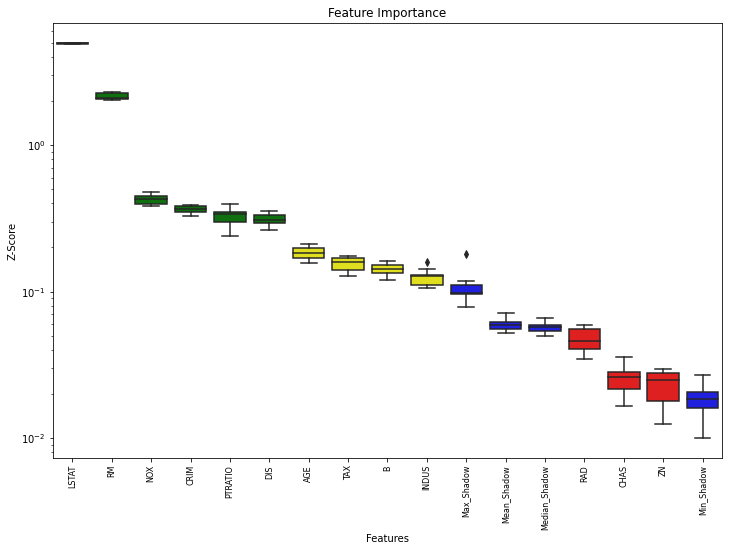

In [7]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')


100%|██████████| 10/10 [00:16<00:00,  1.69s/it]


7 attributes confirmed important: ['PTRATIO', 'TAX', 'NOX', 'LSTAT', 'INDUS', 'AGE', 'RM']
0 attributes confirmed unimportant: []
6 tentative attributes remains: ['B', 'CHAS', 'RAD', 'CRIM', 'ZN', 'DIS']


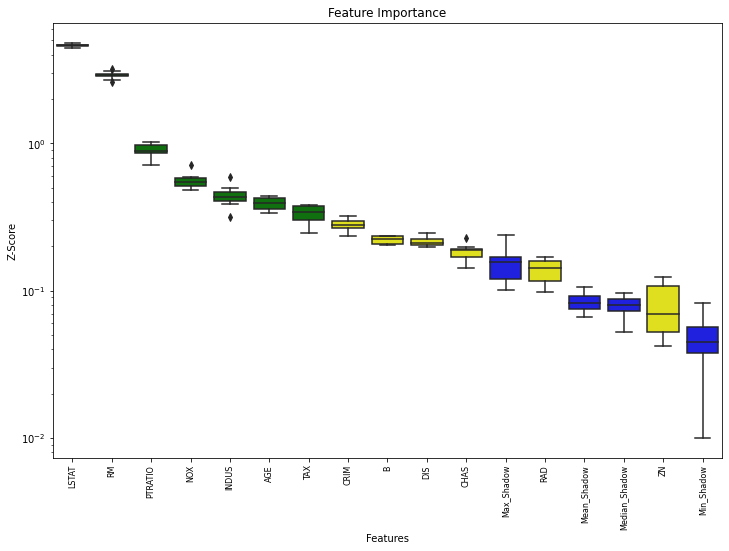

In [8]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

100%|██████████| 10/10 [00:06<00:00,  1.51it/s]


0 attributes confirmed important: []
11 attributes confirmed unimportant: ['PTRATIO', 'TAX', 'CHAS', 'NOX', 'LSTAT', 'CRIM', 'RAD', 'INDUS', 'AGE', 'DIS', 'RM']
2 tentative attributes remains: ['B', 'ZN']


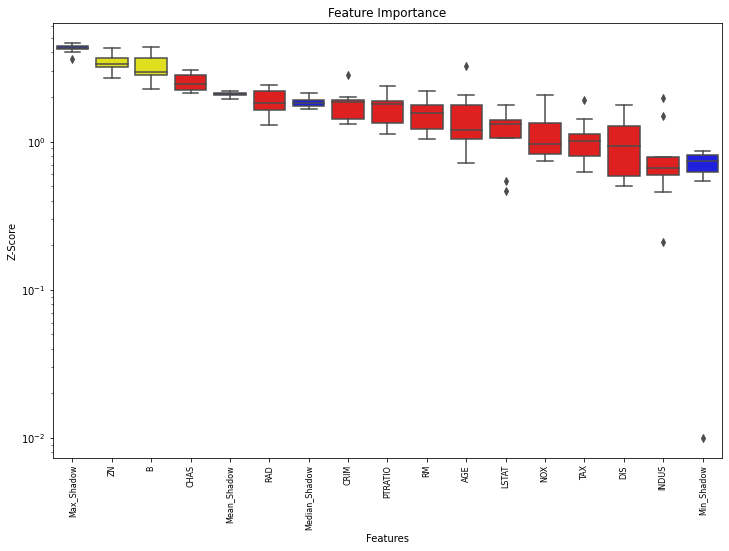

In [9]:
from sklearn.ensemble import IsolationForest
model=IsolationForest()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

In [10]:
from ngboost import NGBRegressor
model=NGBRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

  0%|          | 0/10 [00:00<?, ?it/s]

[iter 0] loss=3.6173 val_loss=0.0000 scale=1.0000 norm=6.6117
[iter 100] loss=2.7373 val_loss=0.0000 scale=2.0000 norm=5.1356
[iter 200] loss=2.1464 val_loss=0.0000 scale=2.0000 norm=3.3087
[iter 300] loss=1.8334 val_loss=0.0000 scale=1.0000 norm=1.3725
[iter 400] loss=1.6387 val_loss=0.0000 scale=1.0000 norm=1.2325


  0%|          | 0/10 [00:03<?, ?it/s]


Exception: Model type not yet supported by TreeExplainer: <class 'ngboost.api.NGBRegressor'>

In [ ]:

from ngboost import NGBRegressor
model=NGBRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')


from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
estimators = [('lr', RidgeCV()),('svr', LinearSVR(random_state=42))]
model= StackingRegressor(estimators=estimators,final_estimator=RandomForestRegressor(n_estimators=10,random_state=42))
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
model= VotingRegressor([('lr', r1), ('rf', r2)])
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')


from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=10, random_state=1)
Feature_Selector.plot(which_features='all')

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
model=HistGradientBoostingClasser()
Feature_Selector = BorutaShap(model=model ,importance_measure='shap',classification=False)
Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=1)
Feature_Selector.plot(which_features='all')